# Exploratory Data Analysis for Recidivism Dataset

## Step 0: Prepare a `MyPyTable` object with the cleaned Recidivism Dataset

In [8]:
import os
from mysklearn.mypytable import MyPyTable

filename = os.path.join("data", "cleaned-recidivism-data-NA.csv")
table = MyPyTable()
table.load_from_file(filename)

## Step 1: Frequency Diagrams
Create frequency diagrams for selected attributes

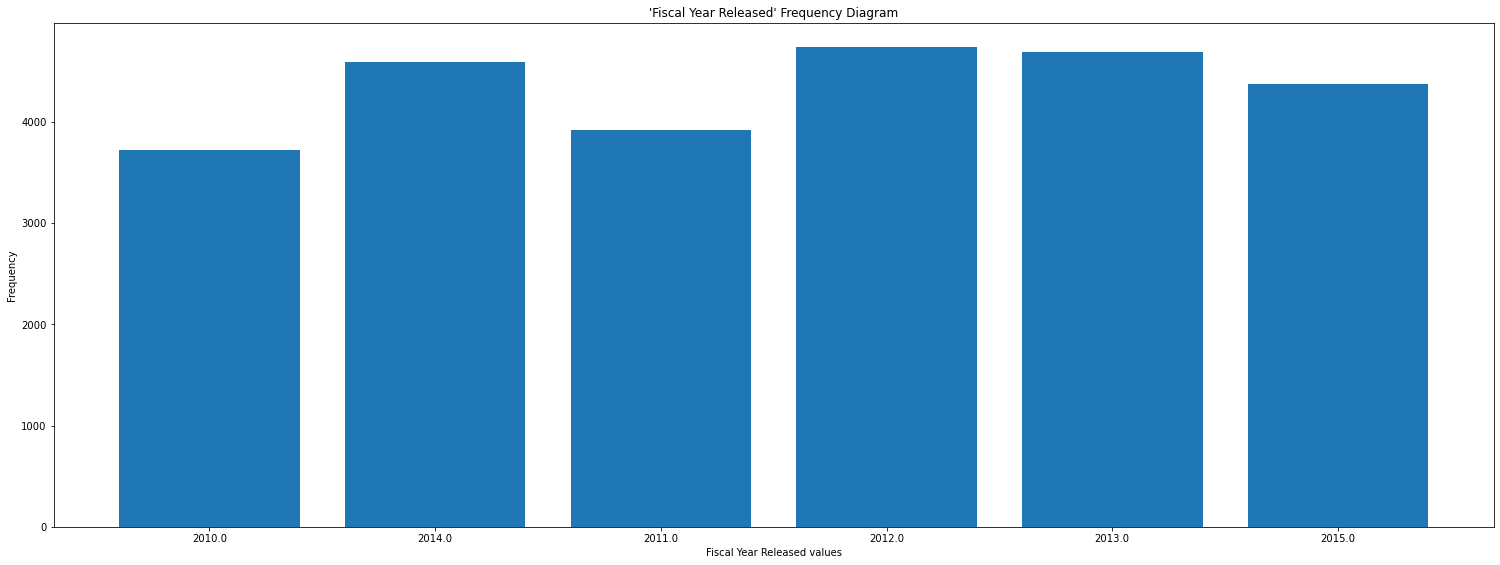

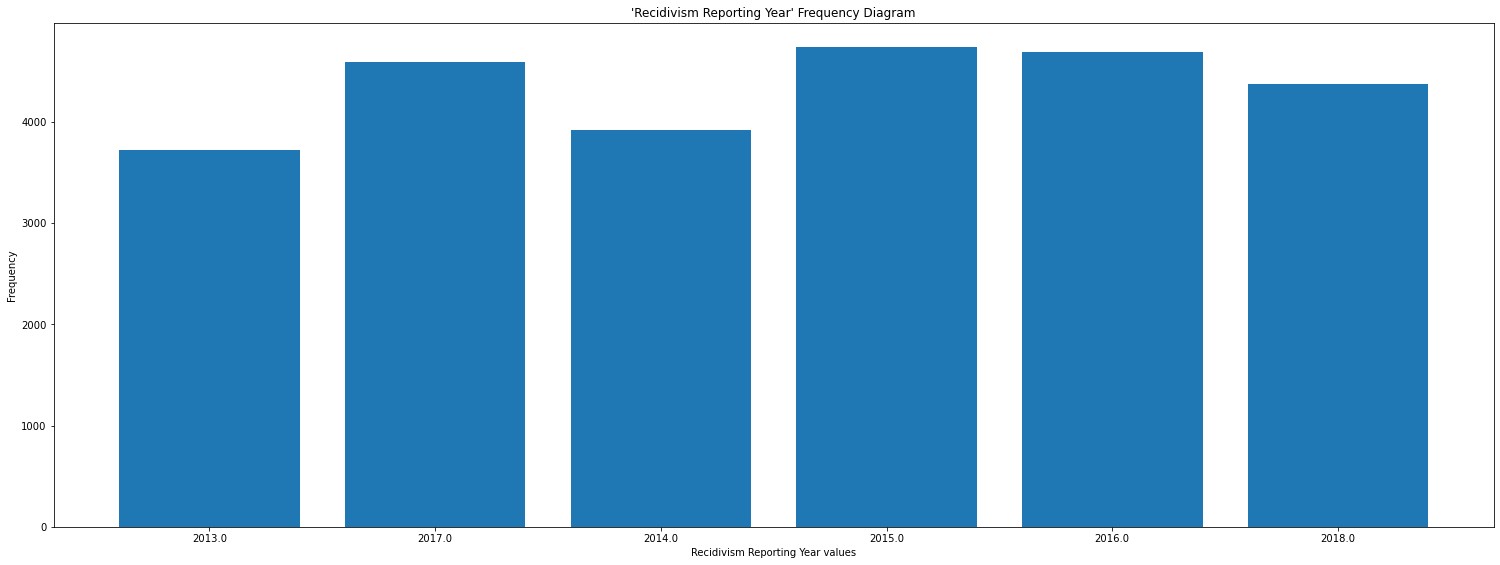

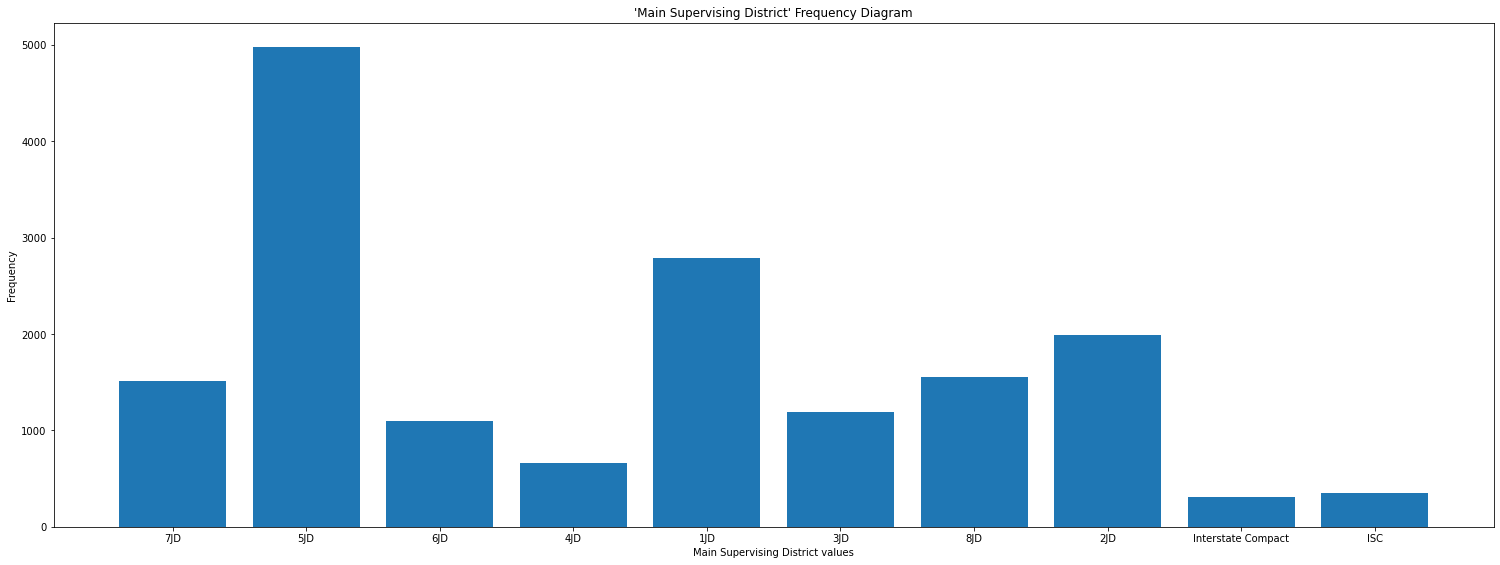

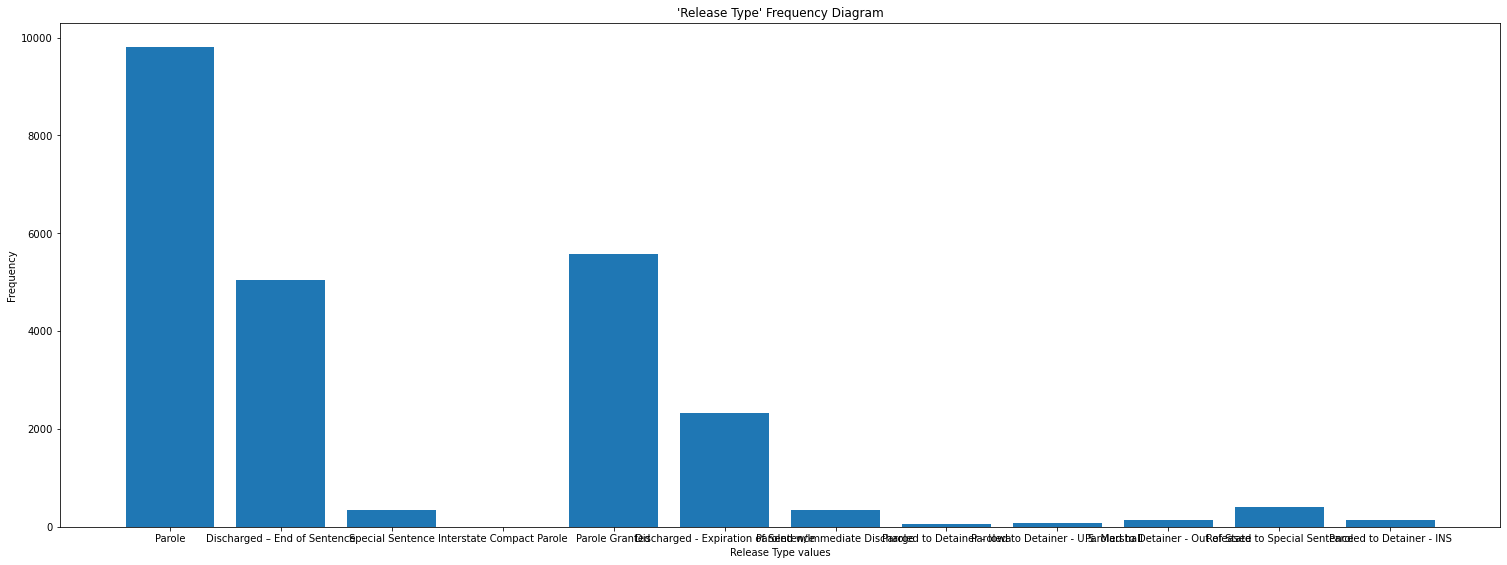

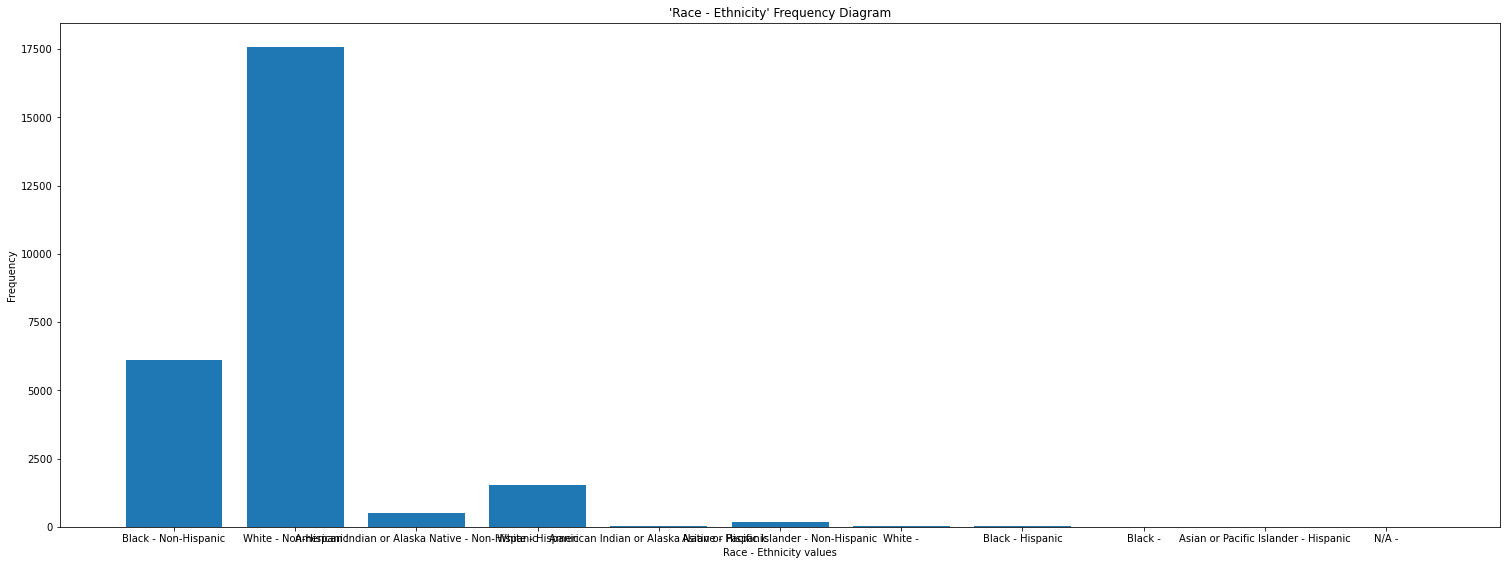

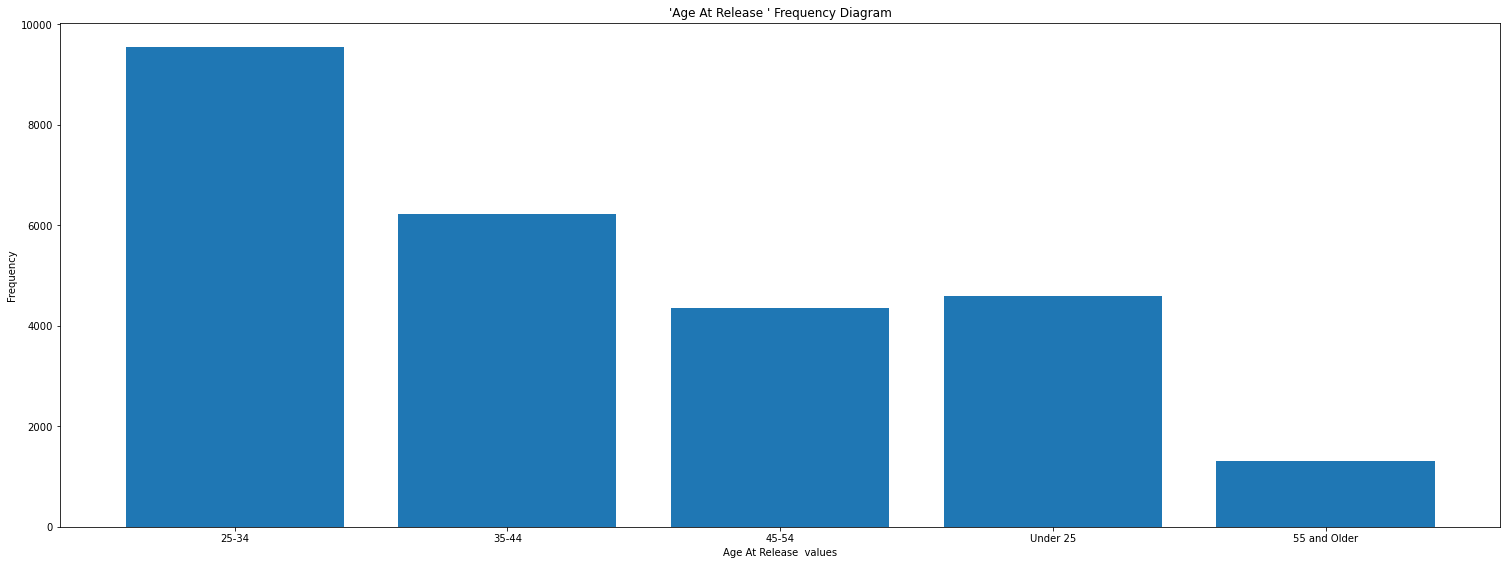

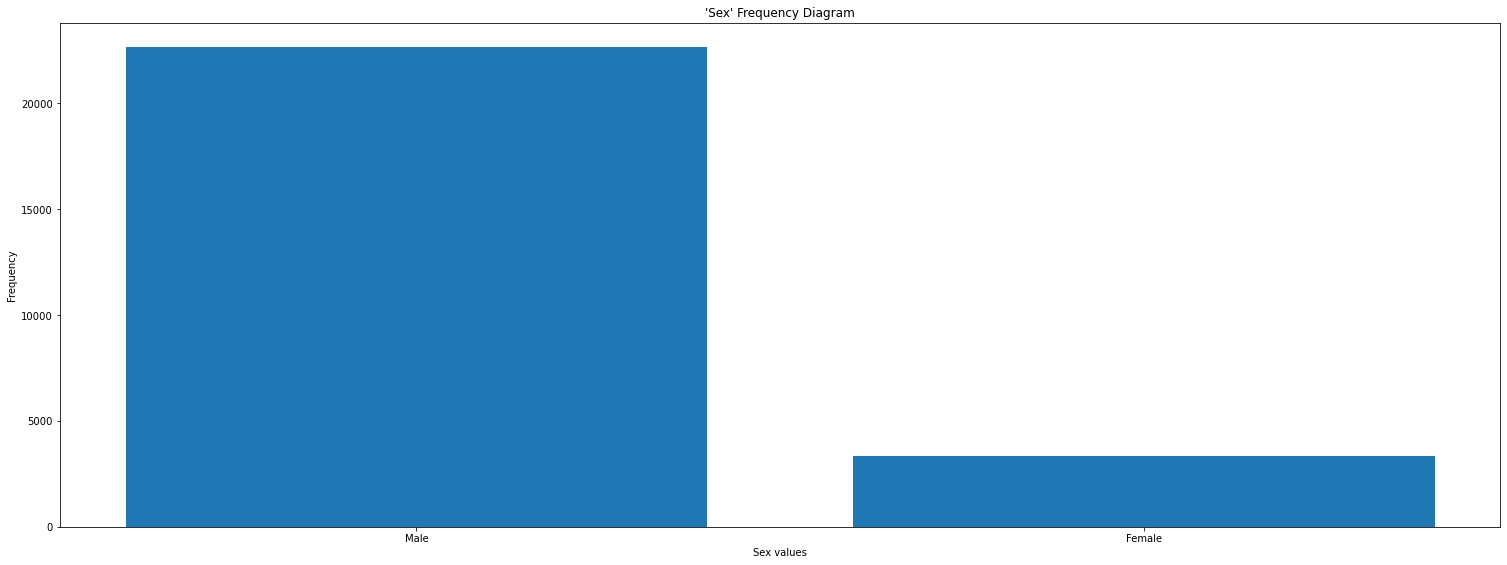

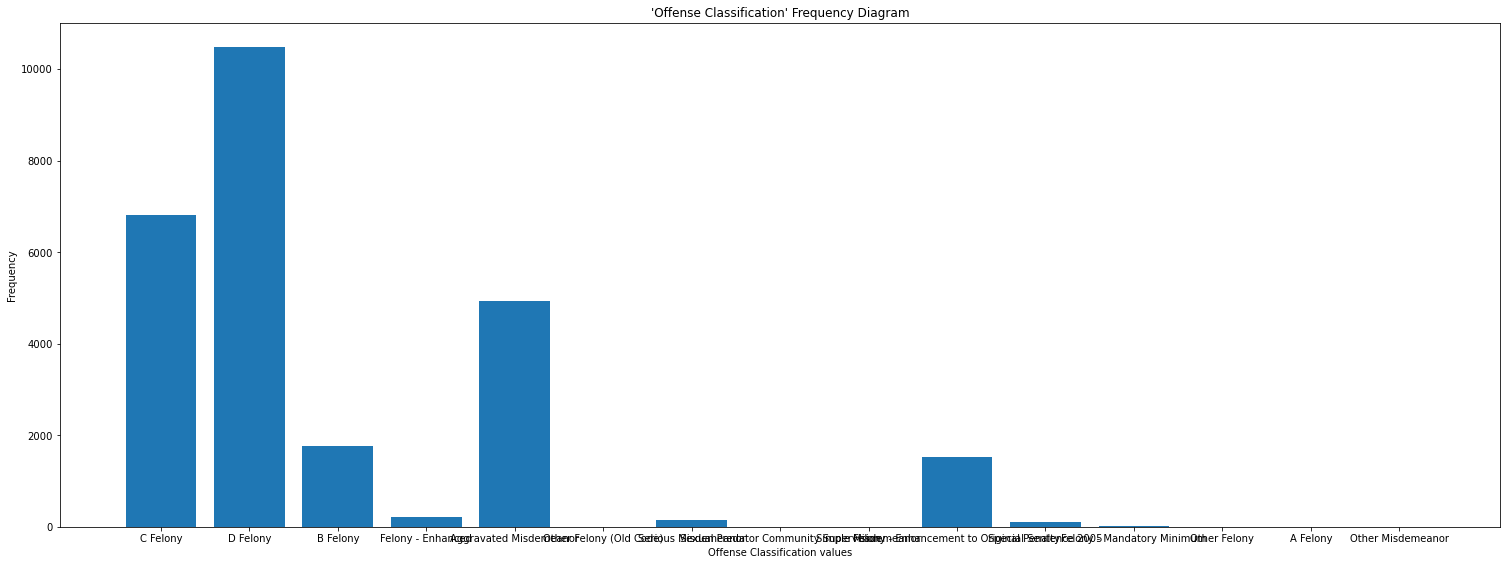

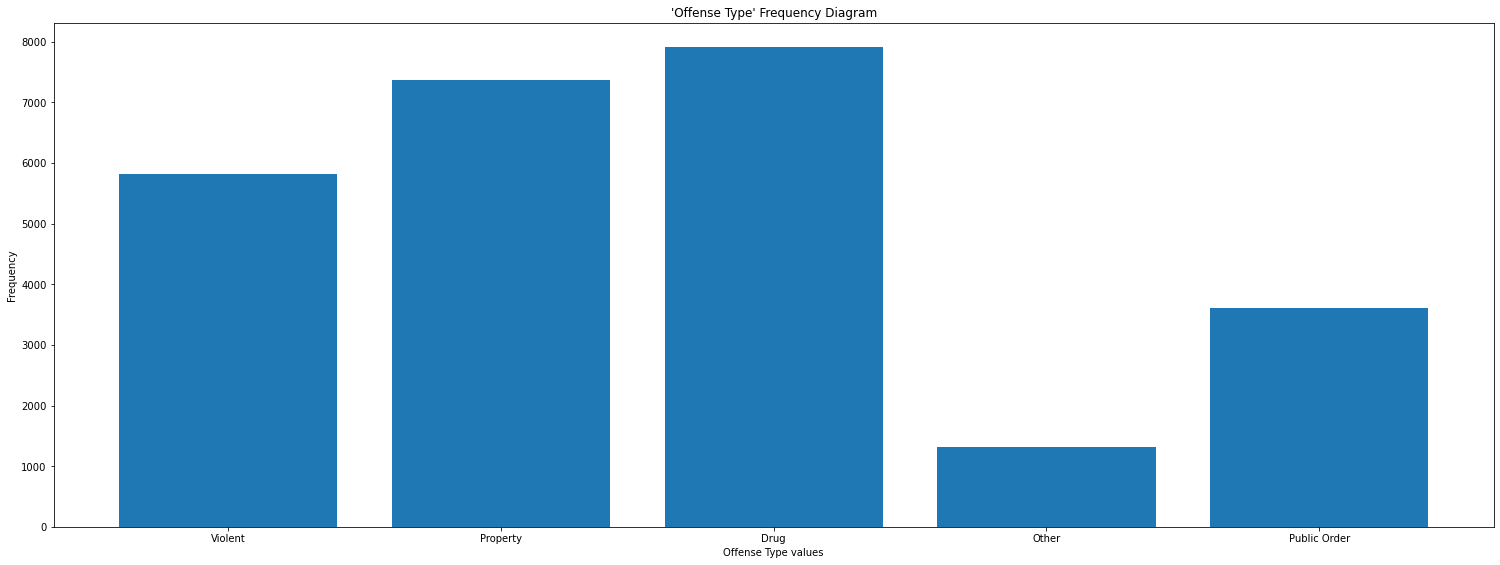

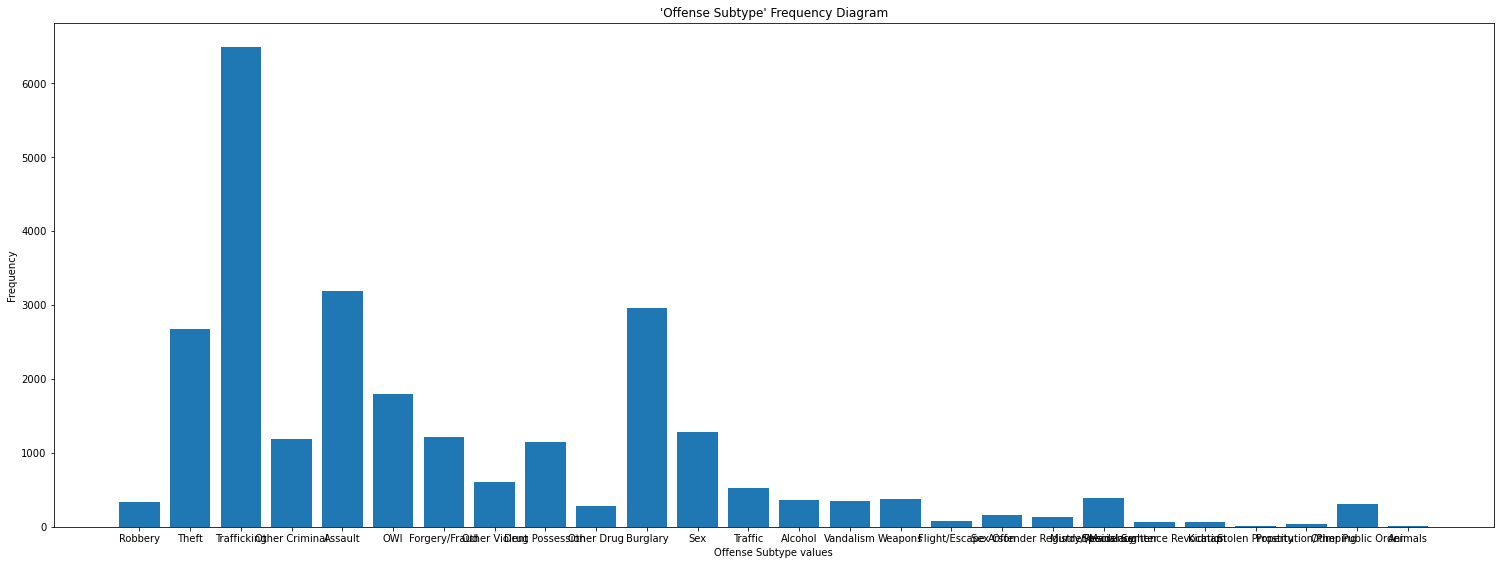

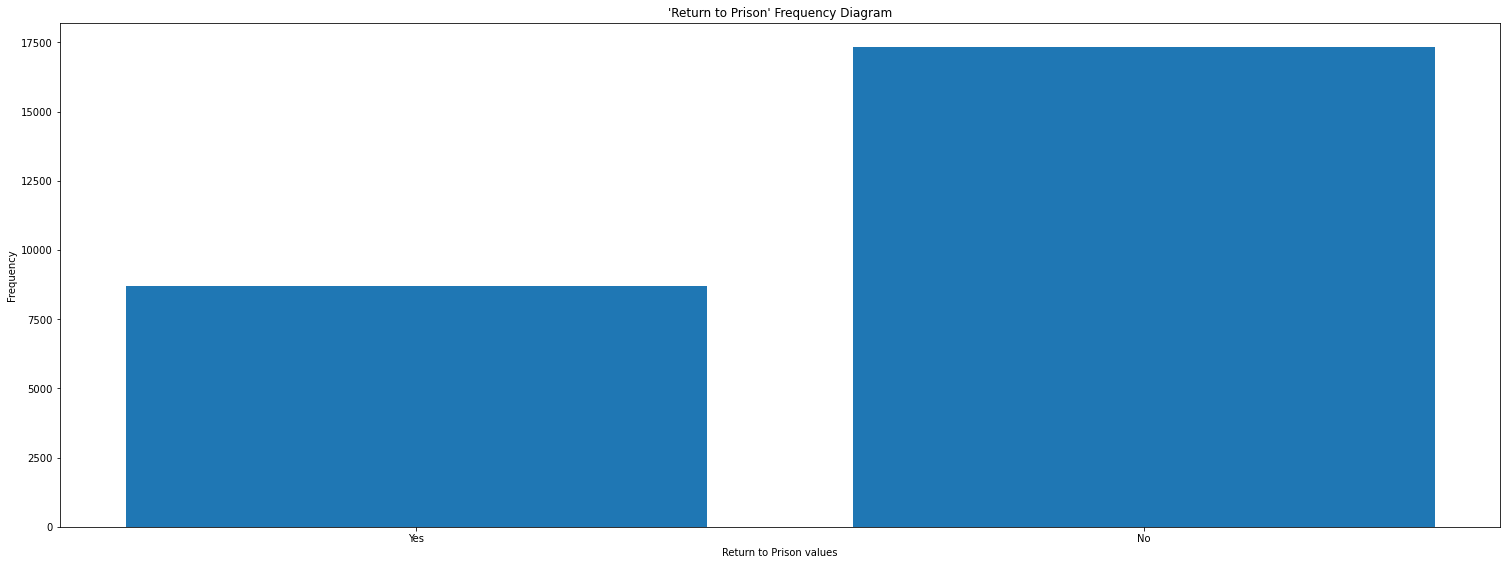

In [9]:
import plot_utils

for column_name in table.column_names:
    attribute_frequencies = table.get_column_frequency(column_name, include_missing_values=True)
    title = f"'{column_name}' Frequency Diagram"
    x_label = f"{column_name} values"
    y_label = "Frequency"
    x_values = attribute_frequencies.keys()
    y_values = attribute_frequencies.values()
    plot_utils.create_frequency_diagram(x_values, y_values, title, x_label, y_label)

## Step 2: Histograms
Create histograms for selected attributes

## Step 3: Categorical/Continuous Relationships
Create scatter plots that compare selected attributes